In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [150]:
df["id"].nunique()

21436

In [151]:
df.drop_duplicates(subset=["id"], keep="first", inplace=True)


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21436 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21436 non-null  int64  
 1   date           21436 non-null  object 
 2   price          21436 non-null  float64
 3   bedrooms       21436 non-null  int64  
 4   bathrooms      21436 non-null  float64
 5   sqft_living    21436 non-null  int64  
 6   sqft_lot       21436 non-null  int64  
 7   floors         21436 non-null  float64
 8   waterfront     21436 non-null  int64  
 9   view           21436 non-null  int64  
 10  condition      21436 non-null  int64  
 11  grade          21436 non-null  int64  
 12  sqft_above     21436 non-null  int64  
 13  sqft_basement  21436 non-null  int64  
 14  yr_built       21436 non-null  int64  
 15  yr_renovated   21436 non-null  int64  
 16  zipcode        21436 non-null  int64  
 17  lat            21436 non-null  float64
 18  long  

In [170]:
df = df.drop(['id', 'date'], axis=1)


In [171]:
pd.set_option('display.max_columns', None)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [167]:
cor = df.corr()
print(cor['price'].sort_values(ascending=False))

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


/tmp/ipykernel_742092/129322031.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


In [172]:
df.rename(columns={'price': 'prix', 'bedrooms': 'chambres','bathrooms': 'sd_bain', 'sqft_living': 'srf_de_vie','sqft_lot': 'srf__total', 'floors': 'etages','waterfront': 'vue_mer', 'view': 'vue', 'sqft_above': 'srf_habitable','sqft_basement': 'srf_soussol', 'yr_built': 'annee_constr','yr_renovated': 'annee_renov', 'sqft_living15': 'srf_de_vie15','sqft_lot15':'srf_total15'}, inplace=True)


In [173]:
df.rename(columns={'srf__total': 'srf_total', 'vue': 'qual_vue','condition': 'etat_general','grade': 'qual_global'}, inplace=True)



In [174]:
df.loc[df['annee_renov'] == 0, 'annee_renov'] = df['annee_constr']


In [158]:
df.to_csv('data_hous.csv', index=False)

In [175]:
df.head()


,prix,chambres,sd_bain,srf_de_vie,srf_total,etages,vue_mer,qual_vue,etat_general,qual_global,srf_habitable,srf_soussol,annee_constr,annee_renov,zipcode,lat,long,srf_de_vie15,srf_total15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


In [178]:
print(df.describe().astype(int))

          prix  chambres  sd_bain  srf_de_vie  srf_total  etages  vue_mer  \
count    21613     21613    21613       21613      21613   21613    21613   
mean    540088         3        2        2079      15106       1        0   
std     367127         0        0         918      41420       0        0   
min      75000         0        0         290        520       1        0   
25%     321950         3        1        1427       5040       1        0   
50%     450000         3        2        1910       7618       1        0   
75%     645000         4        2        2550      10688       2        0   
max    7700000        33        8       13540    1651359       3        1   

       qual_vue  etat_general  qual_global  srf_habitable  srf_soussol  \
count     21613         21613        21613          21613        21613   
mean          0             3            7           1788          291   
std           0             0            1            828          442   
min       

In [180]:
print(df['zipcode'].value_counts())

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64


In [185]:
moyennes_par_zipcode = df.groupby('zipcode')['prix'].mean().astype(int)
print(moyennes_par_zipcode.sort_values(ascending=False))

zipcode
98039    2160606
98004    1355927
98040    1194230
98112    1095499
98102     901258
          ...   
98148     284908
98001     280804
98032     251296
98168     240328
98002     234284
Name: prix, Length: 70, dtype: int64


In [186]:
cor = df.corr()
print(cor['prix'].sort_values(ascending=False))

prix             1.000000
srf_de_vie       0.702035
qual_global      0.667434
srf_habitable    0.605567
srf_de_vie15     0.585379
sd_bain          0.525138
qual_vue         0.397293
srf_soussol      0.323816
chambres         0.308350
lat              0.307003
vue_mer          0.266369
etages           0.256794
annee_renov      0.105755
srf_total        0.089661
srf_total15      0.082447
annee_constr     0.054012
etat_general     0.036362
long             0.021626
zipcode         -0.053203
Name: prix, dtype: float64


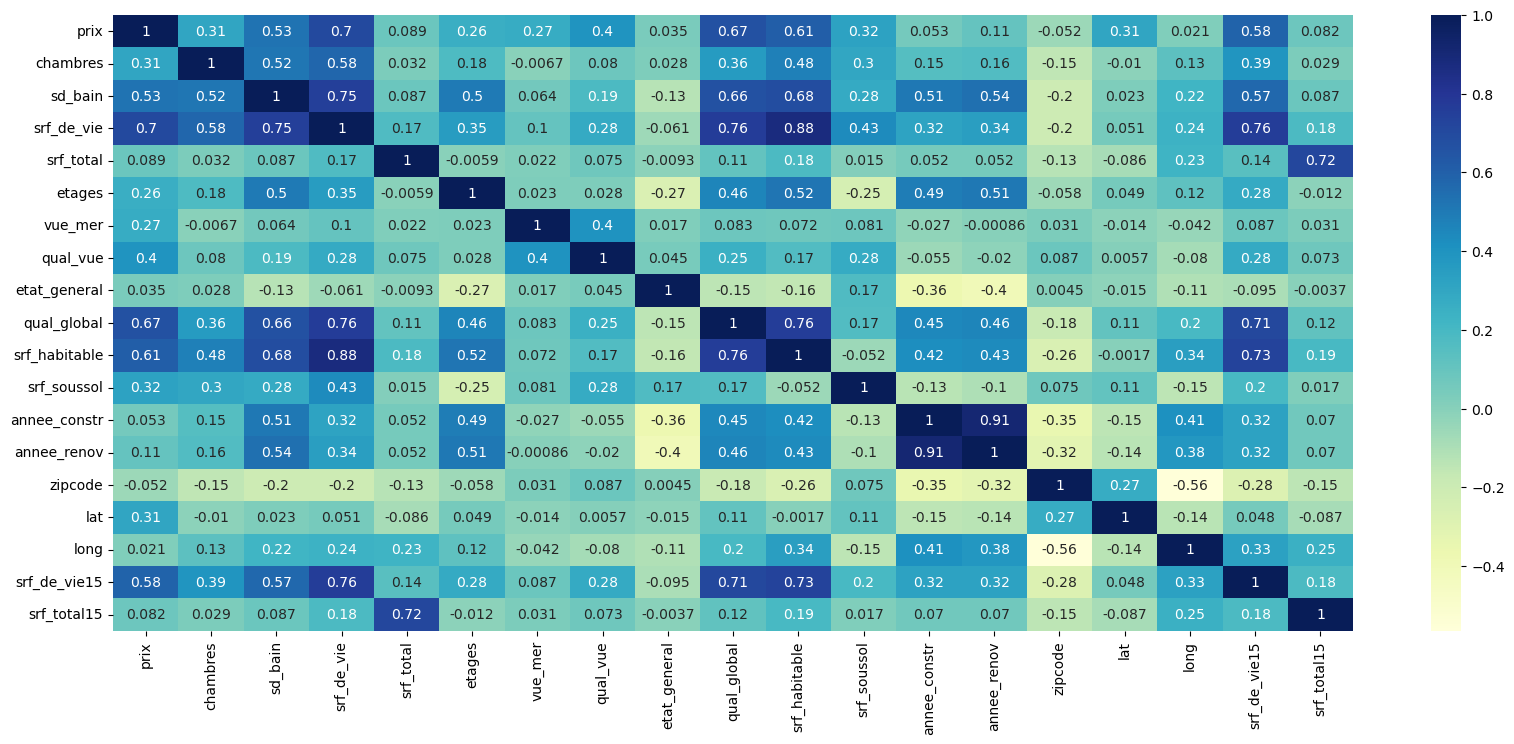

In [162]:
plt.figure(figsize=(20, 8))
sns.heatmap(cor, cmap='YlGnBu', annot=True)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

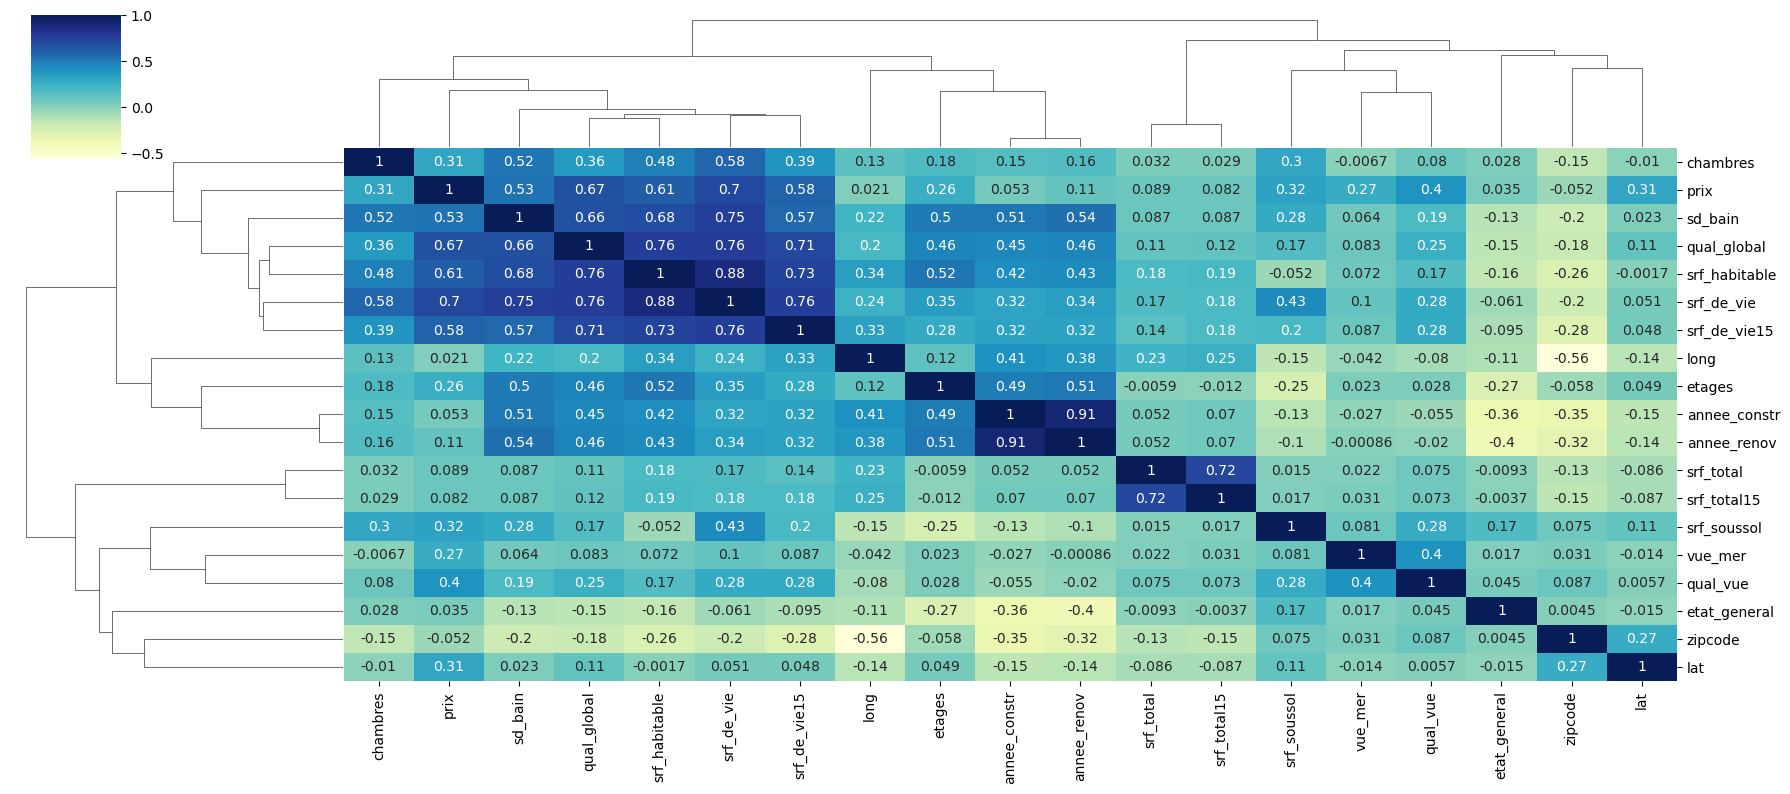

In [163]:
sns.clustermap(cor, cmap='YlGnBu', annot=True, figsize=(18, 8))
plt.show

In [164]:
df_test1 = df.drop(columns=['srf_habitable',  'annee_constr', 'etat_general'])
df_test1.to_csv('test_data_hous.csv', index=False)
